#Cell 1: Import thư viện và Tải dữ liệu

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cấu hình giao diện
sns.set(style='whitegrid')
plt.style.use('fivethirtyeight')

ticker = 'FPT.VN'
start_date = '2020-01-01'
end_date = '2023-12-31'

print(f"Downloading data for {ticker}...")
# Tải dữ liệu
df = yf.download(ticker, start=start_date, end=end_date)

# --- PHẦN SỬA LỖI QUAN TRỌNG ---
# 1. Xử lý nếu dữ liệu trả về dạng MultiIndex (Lỗi thường gặp ở bản mới)
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# 2. Ở phiên bản mới, giá điều chỉnh nằm ở cột 'Close' (thay vì 'Adj Close')
# Chúng ta sẽ ưu tiên lấy 'Adj Close' nếu có, nếu không thì lấy 'Close'
col_name = 'Adj Close' if 'Adj Close' in df.columns else 'Close'

df = df[[col_name]].rename(columns={col_name: 'Price'})
# -------------------------------

print("Dữ liệu sau khi xử lý:")
print(df.head())

/tmp/ipython-input-2749650978.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Dữ liệu sau khi xử lý:
Price              Price
Date                    
2020-01-02  23034.029297
2020-01-03  22640.957031
2020-01-06  22405.113281
2020-01-07  22837.494141
2020-01-08  22326.500000


#Cell 2: Tính Lợi nhuận (Returns) và Biến động (Volatility)

In [3]:
# 2. Tính Daily Returns (Lợi nhuận hàng ngày)
# Công thức: (Giá hôm nay - Giá hôm qua) / Giá hôm qua
df['Daily_Return'] = df['Price'].pct_change()

# Loại bỏ dòng đầu tiên bị NaN do không có dữ liệu ngày trước đó
df.dropna(inplace=True)

# 3. Tính Volatility (Độ biến động)
# Volatility thường được đo bằng Độ lệch chuẩn (Standard Deviation)
daily_volatility = df['Daily_Return'].std()

# Annualized Volatility (Biến động theo năm)
# Giả sử 1 năm có 252 ngày giao dịch chứng khoán
annual_volatility = daily_volatility * np.sqrt(252)

print(f"Daily Volatility: {daily_volatility:.2%}")
print(f"Annualized Volatility (Rủi ro năm): {annual_volatility:.2%}")

Daily Volatility: 1.80%
Annualized Volatility (Rủi ro năm): 28.58%


#Cell 3: Phân tích Phân phối lợi nhuận (Distribution Analysis)

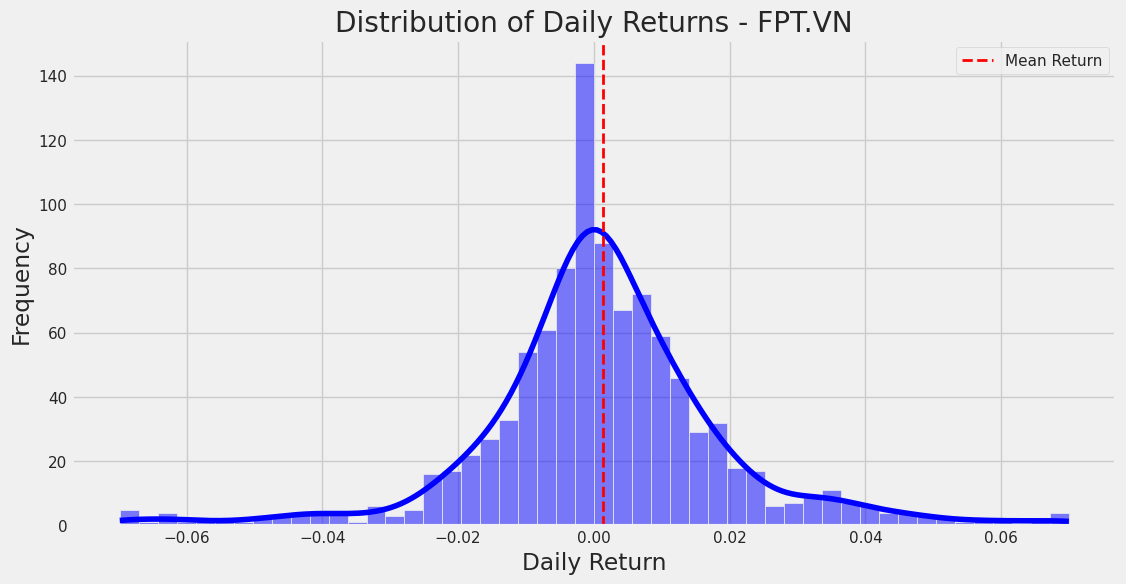

In [4]:
# 4. Vẽ biểu đồ phân phối lợi nhuận (Histogram)
plt.figure(figsize=(12, 6))
sns.histplot(df['Daily_Return'], bins=50, kde=True, color='blue')
plt.title(f'Distribution of Daily Returns - {ticker}')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

# Vẽ đường trung bình (Mean)
plt.axvline(df['Daily_Return'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Return')
plt.legend()
plt.show()

# Nhận xét ngắn: Biểu đồ càng bè ra 2 bên thì rủi ro càng cao (biến động mạnh).

#Cell 4: Tính Max Drawdown (Mức sụt giảm tối đa)

Max Drawdown (Mức lỗ tối đa từ đỉnh): -32.18%


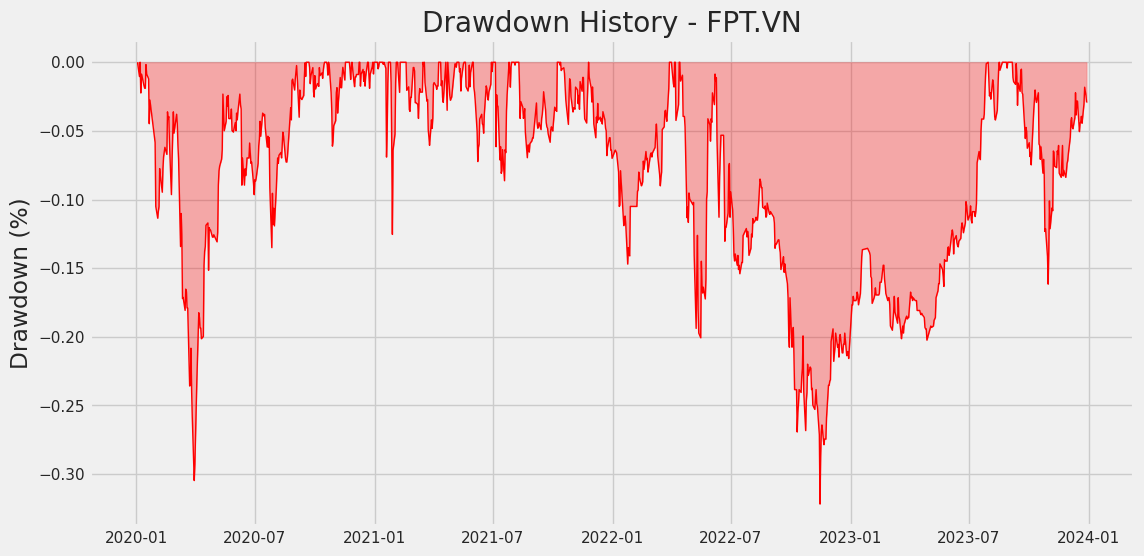

In [5]:
# 5. Tính Max Drawdown (MDD)
# Bước 1: Tính đỉnh cao nhất tính đến hiện tại (Running Maximum)
df['Running_Max'] = df['Price'].cummax()

# Bước 2: Tính mức sụt giảm so với đỉnh (Drawdown)
df['Drawdown'] = (df['Price'] / df['Running_Max']) - 1

# Bước 3: Tìm mức sụt giảm sâu nhất trong lịch sử
max_drawdown = df['Drawdown'].min()

print(f"Max Drawdown (Mức lỗ tối đa từ đỉnh): {max_drawdown:.2%}")

# 6. Vẽ biểu đồ Drawdown
plt.figure(figsize=(12, 6))
plt.fill_between(df.index, df['Drawdown'], color='red', alpha=0.3)
plt.plot(df['Drawdown'], color='red', linewidth=1)
plt.title(f'Drawdown History - {ticker}')
plt.ylabel('Drawdown (%)')
plt.show()